<a href="https://colab.research.google.com/github/Kibugu/Data-Science-Projects/blob/master/Case_Study_sunking_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = yellow /> CASE STUDY OF SUNKING PRODUCT IN KENYA:  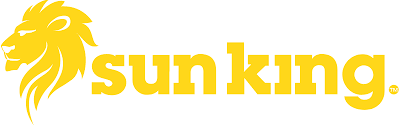

#<font color = blue /> 1.1 Data Manipulation

On this section we are going to ingest data into the system. I adopted this approach as when we have a huge data that is above 100,000  the excel manipulation of data is slow and not ideal for big data analysis.

In [4]:
# importing necessary libraries for ingesting data.
import numpy as np 
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn

In [8]:
# ingest data 
dfusers= pd.read_csv('users.csv')
dfinve=pd.read_csv("inventory.csv")
df2qsales=pd.read_csv("sales_2q20.csv")
df3qsales=pd.read_csv("sales_3q20.csv")

#<font color = blue /> 1.2 Exporatory Data Analysis (EDA):

### *In this Section we are going to do basic descriptive statistics and get to understand our data based on the attributes that the data has and compare as see what stand out interms of growth and performance on different areas and products under the different segment.*

## <font color = blue /> 1.2.1 Users and region:

In [9]:
# view the first 5 rows.
dfusers.head()
dfusers=dfusers[['user_id','user_type']]

In [10]:
# this gives the count of users in the following sheet.
dfusers.describe()

,user_id
count,10104.000000
mean,5052.500000
std,2916.917894
min,1.000000
25%,2526.750000
50%,5052.500000
75%,7578.250000
max,10104.000000


In [11]:
# Checking on missing nos
dfusers.isnull().sum()

user_id      0
user_type    0
dtype: int64

In [12]:
dfusers.groupby("user_type")["user_id"].count()

user_type
Agent     10019
Retail       85
Name: user_id, dtype: int64

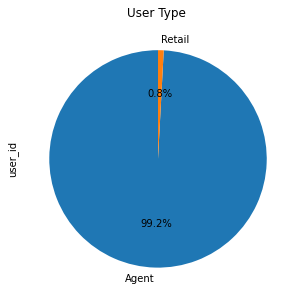

In [13]:
dfusers.groupby("user_type")["user_id"].count().plot.pie(figsize=(5,5),
                                                        startangle=90, autopct='%.1f%%',
                                                        title ="User Type ");

##<font color = blue /> 1.2.2 - Inventory:

In [14]:
dfinve.head()

,user_id,product_name,account_number,stock_status,days_held
0,18,SKU A,11603,In Stock,0
1,33,SKU A,9798,In Stock,0
2,44,SKU A,9518,In Stock,0
3,64,SKU C,11350,In Stock,0
4,95,SKU A,848,In Stock,0


In [15]:
# The categorisation of stock status:
dfinve['stock_status'].nunique()

1

In [16]:
dfinve.describe()

,user_id,account_number,days_held
count,24807.000000,24807.000000,24807.000000
mean,5095.051961,6162.585036,139.408635
std,2905.800590,3560.579700,136.814228
min,1.000000,1.000000,0.000000
25%,2600.500000,3101.000000,28.000000
50%,5117.000000,6143.000000,91.000000
75%,7605.000000,9246.000000,222.000000
max,10104.000000,12345.000000,565.000000


In [17]:
# Checking on missing nos
dfinve.isnull().sum()

user_id           0
product_name      0
account_number    0
stock_status      0
days_held         0
dtype: int64

**We are analysing on average no of days per items in our warehouse based on the inventory report.**

In [18]:
dfinve.groupby('product_name')['days_held'].mean().sort_values(ascending = True)

product_name
SKU C     18.083333
SKU B    102.956076
SKU A    107.793791
SKU D    157.980365
SKU E    180.729932
Name: days_held, dtype: float64

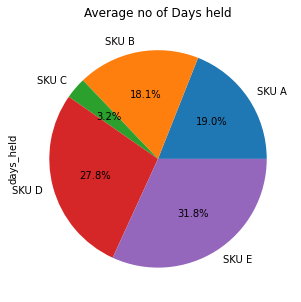

In [32]:
dfinve.groupby('product_name')['days_held'].mean().plot.pie( figsize=(5,5), 
                                                            autopct='%0.1f%%',
                                                            title = "Average no of Days held");

### <font color = brown/> Observations on Inventory on days held.
**Based in the above data we can see that on averaged on chronological order. The fast moving products is SKU C which oon average the no of days held was 18 days and the item that we can categorise as a dead stock is SKU - E has the highest no of days with average of 180 days in storage.**

Based on the data provided we have categorised the data based on 2 categories.
- The no of sold items ( days held = 0)
- The items available for sales.

In [81]:
dfsold=dfinve[dfinve.days_held==0]

In [82]:
dfsold.head()

,user_id,product_name,account_number,stock_status,days_held
0,18,SKU A,11603,In Stock,0
1,33,SKU A,9798,In Stock,0
2,44,SKU A,9518,In Stock,0
3,64,SKU C,11350,In Stock,0
4,95,SKU A,848,In Stock,0


In [83]:
dfplan=dfinve[dfinve.days_held > 0]

In [84]:
dfplan.head()

,user_id,product_name,account_number,stock_status,days_held
666,34,SKU A,9773,In Stock,1
667,35,SKU A,11596,In Stock,1
668,47,SKU A,7168,In Stock,1
669,52,SKU E,9595,In Stock,1
670,60,SKU D,8129,In Stock,1


In [85]:
df1=dfplan.groupby('product_name')['days_held'].count()

In [86]:
df2=dfsold.groupby('product_name')['days_held'].count()

In [87]:
df1 = pd.DataFrame(df1)
df2= pd.DataFrame(df2)
dfsoldvsplan=df1.merge(df2,on='product_name')

In [88]:
dfsoldvsplan

,days_held_x,days_held_y
product_name,,
SKU A,5020,295
SKU B,4023,75
SKU C,30,6
SKU D,13552,199
SKU E,1516,91


In [89]:
dfsoldvsplan.columns

Index(['days_held_x', 'days_held_y'], dtype='object')

In [93]:
# rename the columns and introduce a new column on performance.
dfsoldvsplan=dfsoldvsplan.rename(columns={"days_held_x": "Items_available", "days_held_y": "Sold_items"})

In [96]:
# rename the columns and introduce a new column on performance.
dfsoldvsplan["% Performance"]=dfsoldvsplan['Sold_items']/dfsoldvsplan['Items_available']*100

In [97]:
dfsoldvsplan.head()

,Items_available,Sold_items,% Performance
product_name,,,
SKU A,5020,295,5.876494
SKU B,4023,75,1.864280
SKU C,30,6,20.000000
SKU D,13552,199,1.468418
SKU E,1516,91,6.002639


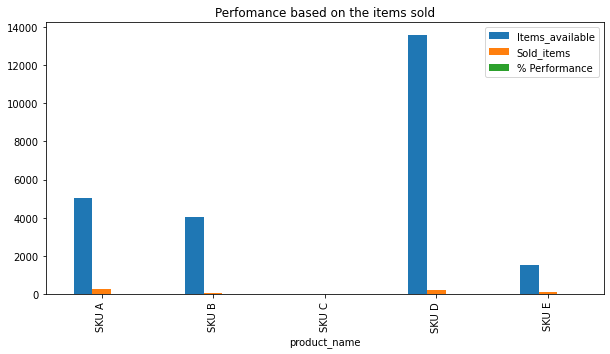

In [104]:
dfsoldvsplan.plot.bar(figsize=(10,5),
                  title = "Perfomance based on the items sold",
                  legend = True,
                  label=True);

## <font color = blue /> 1.2.3 Sales Quarter 2 & 3:

In [47]:
# view the format of our data and columns
df2qsales.head()


,user_id,registration_date,month,account_number,Area
0,1,24-06-20,6,94312253,Akala
1,1,18-06-20,6,93845755,Akala
2,1,14-06-20,6,50839658,Akala
3,1,11-06-20,6,73909669,Akala
4,1,07-06-20,6,65928327,Akala


In [51]:
# Checking on missing nos
df2qsales.isnull().sum()

user_id              0
registration_date    0
month                0
account_number       0
Area                 0
dtype: int64

In [48]:
df2qsales.describe()

,user_id,month,account_number
count,123901.000000,123901.000000,1.239010e+05
mean,5028.780728,4.737557,5.107971e+07
std,2941.080646,0.788953,2.944943e+07
min,1.000000,4.000000,-9.174000e+03
25%,2468.000000,4.000000,1.861350e+07
50%,5012.000000,5.000000,4.958318e+07
75%,7568.000000,5.000000,7.360078e+07
max,10104.000000,6.000000,9.999108e+07


**In this section we are going to look at the data interms of monthly production and the leading area of sales based on the above information.**



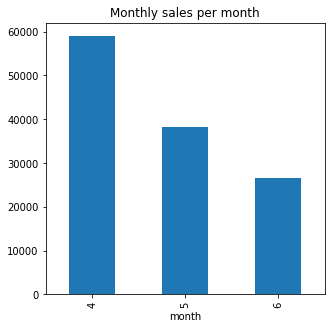

In [228]:
df2qsales.groupby('month')['user_id'].count().plot.bar(figsize=(5,5),
                                                       legend=False,
                                                       title = "Monthly sales per month");

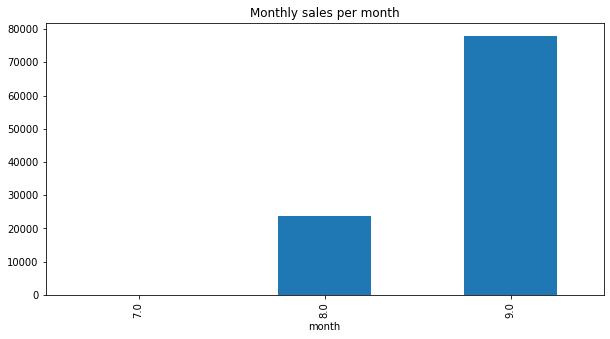

In [124]:
df3qsales.groupby('month')['user_id'].count().plot.bar(figsize=(10,5),
                                                       legend=False,
                                                       title = "Monthly sales per month");

**The Overall performance of sales based on Areas.**

 - 2nd Quarter overall  performance on area that we serve.

In [190]:
df2qsales.groupby('Area')['user_id'].count()

Area
Akala           3541
Bomet            494
Bondo           4899
Bungoma         4340
Burnt Forest     562
                ... 
Taita Taveta    1777
Ukunda           475
Vihiga          1544
Webuye           422
West Pokot      1955
Name: user_id, Length: 68, dtype: int64

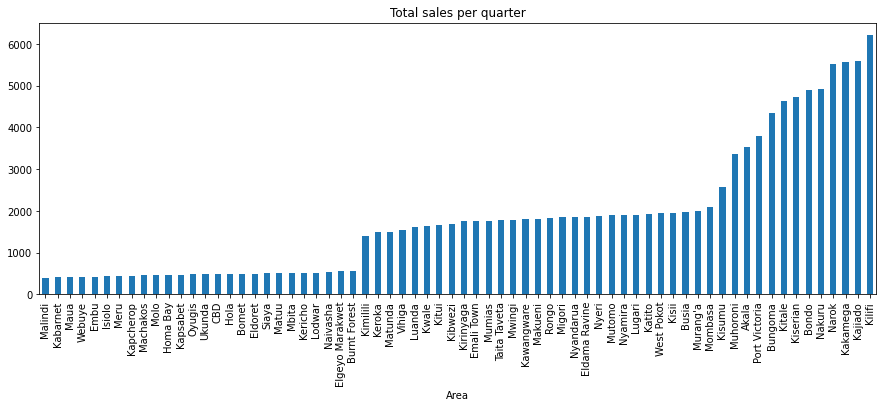

In [191]:
df2qsales.groupby('Area')['user_id'].count().sort_values(ascending = True).plot.bar(figsize=(15,5),
                                                       legend=False,
                                                       title = "Total sales per quarter");

- 3rd Quarter overall  performance on area that we serve.

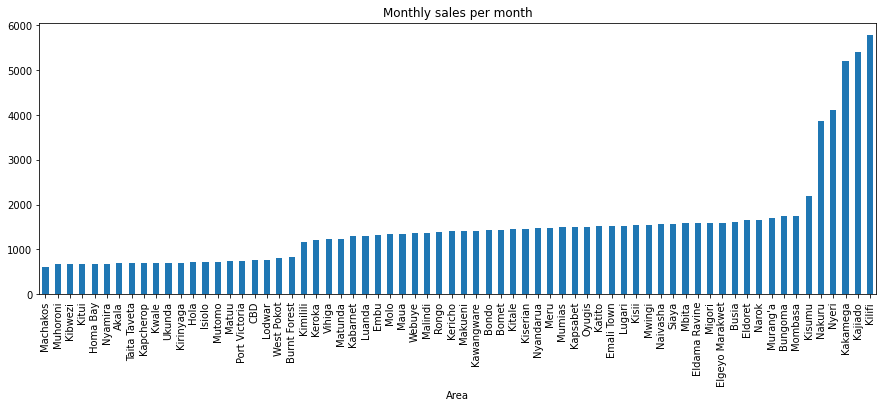

In [189]:
df3qsales.groupby('Area')['user_id'].count().sort_values(ascending = True).plot.bar(figsize=(15,5),
                                                       legend=False,
                                                       title = "Monthly sales per month");

**MONTHLY PERFORMANCE PER AREA:**

**-  2nd Quarter perfomance based on months and area**

Monthly  Summary on the regional sales and month performance in the 2nd Quarter. The table gives us the maximum no of sales in each area and the maximum no of sales in each month.

In [219]:
dfmontharea = df2qsales.pivot_table('user_id',index='month',columns='Area',aggfunc= 'count')


In [220]:
dfmontharea.head()

Area,Akala,Bomet,Bondo,Bungoma,Burnt Forest,Busia,CBD,Eldama Ravine,Eldoret,Elgeyo Marakwet,Emali Town,Embu,Hola,Homa Bay,Isiolo,Kabarnet,Kajiado,Kakamega,Kapcherop,Kapsabet,Katito,Kawangware,Kericho,Keroka,Kibwezi,Kilifi,Kimilili,Kirinyaga,Kiserian,Kisii,Kisumu,Kitale,Kitui,Kwale,Lodwar,Luanda,Lugari,Machakos,Makueni,Malindi,Matunda,Matuu,Maua,Mbita,Meru,Migori,Molo,Mombasa,Muhoroni,Mumias,Murang'a,Mutomo,Mwingi,Naivasha,Nakuru,Narok,Nyamira,Nyandarua,Nyeri,Oyugis,Port Victoria,Rongo,Siaya,Taita Taveta,Ukunda,Vihiga,Webuye,West Pokot
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,1351.0,494.0,1744.0,1677.0,562.0,924.0,477.0,914.0,497.0,558.0,849.0,423.0,489.0,464.0,430.0,409.0,2008.0,1960.0,442.0,465.0,904.0,860.0,512.0,707.0,828.0,2249.0,683.0,808.0,1674.0,916.0,1237.0,1630.0,796.0,778.0,518.0,780.0,885.0,452.0,861.0,386.0,731.0,508.0,420.0,509.0,433.0,918.0,464.0,999.0,1294.0,822.0,942.0,918.0,863.0,535.0,1762.0,1983.0,941.0,888.0,890.0,475.0,1412.0,887.0,499.0,871.0,475.0,693.0,422.0,931.0
5,1299.0,NaN,1866.0,1610.0,NaN,624.0,NaN,570.0,NaN,NaN,521.0,NaN,NaN,NaN,NaN,NaN,2108.0,2092.0,NaN,NaN,579.0,546.0,NaN,452.0,513.0,2292.0,425.0,567.0,1832.0,619.0,774.0,1756.0,521.0,521.0,NaN,483.0,571.0,NaN,567.0,NaN,457.0,NaN,NaN,NaN,NaN,577.0,NaN,663.0,1176.0,535.0,635.0,580.0,554.0,NaN,1883.0,2094.0,569.0,564.0,592.0,NaN,1405.0,600.0,NaN,537.0,NaN,509.0,NaN,608.0
6,891.0,NaN,1289.0,1053.0,NaN,432.0,NaN,373.0,NaN,NaN,383.0,NaN,NaN,NaN,NaN,NaN,1486.0,1516.0,NaN,NaN,433.0,397.0,NaN,324.0,344.0,1664.0,280.0,375.0,1235.0,420.0,568.0,1251.0,354.0,343.0,NaN,347.0,453.0,NaN,387.0,NaN,317.0,NaN,NaN,NaN,NaN,354.0,NaN,423.0,884.0,401.0,427.0,401.0,373.0,NaN,1288.0,1444.0,398.0,404.0,399.0,NaN,978.0,353.0,NaN,369.0,NaN,342.0,NaN,416.0


In [221]:
dfmontharea['Max_Sales']=dfmontharea.max(axis=1,skipna=True)
dfmontharea['Highest no of month sales']=dfmontharea.apply(lambda x : x.idxmax(), axis=1)   

In [222]:
dfmontharea.head()

Area,Akala,Bomet,Bondo,Bungoma,Burnt Forest,Busia,CBD,Eldama Ravine,Eldoret,Elgeyo Marakwet,Emali Town,Embu,Hola,Homa Bay,Isiolo,Kabarnet,Kajiado,Kakamega,Kapcherop,Kapsabet,Katito,Kawangware,Kericho,Keroka,Kibwezi,Kilifi,Kimilili,Kirinyaga,Kiserian,Kisii,Kisumu,Kitale,Kitui,Kwale,Lodwar,Luanda,Lugari,Machakos,Makueni,Malindi,Matunda,Matuu,Maua,Mbita,Meru,Migori,Molo,Mombasa,Muhoroni,Mumias,Murang'a,Mutomo,Mwingi,Naivasha,Nakuru,Narok,Nyamira,Nyandarua,Nyeri,Oyugis,Port Victoria,Rongo,Siaya,Taita Taveta,Ukunda,Vihiga,Webuye,West Pokot,Max_Sales,Highest no of month sales
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,1351.0,494.0,1744.0,1677.0,562.0,924.0,477.0,914.0,497.0,558.0,849.0,423.0,489.0,464.0,430.0,409.0,2008.0,1960.0,442.0,465.0,904.0,860.0,512.0,707.0,828.0,2249.0,683.0,808.0,1674.0,916.0,1237.0,1630.0,796.0,778.0,518.0,780.0,885.0,452.0,861.0,386.0,731.0,508.0,420.0,509.0,433.0,918.0,464.0,999.0,1294.0,822.0,942.0,918.0,863.0,535.0,1762.0,1983.0,941.0,888.0,890.0,475.0,1412.0,887.0,499.0,871.0,475.0,693.0,422.0,931.0,2249.0,Kilifi
5,1299.0,NaN,1866.0,1610.0,NaN,624.0,NaN,570.0,NaN,NaN,521.0,NaN,NaN,NaN,NaN,NaN,2108.0,2092.0,NaN,NaN,579.0,546.0,NaN,452.0,513.0,2292.0,425.0,567.0,1832.0,619.0,774.0,1756.0,521.0,521.0,NaN,483.0,571.0,NaN,567.0,NaN,457.0,NaN,NaN,NaN,NaN,577.0,NaN,663.0,1176.0,535.0,635.0,580.0,554.0,NaN,1883.0,2094.0,569.0,564.0,592.0,NaN,1405.0,600.0,NaN,537.0,NaN,509.0,NaN,608.0,2292.0,Kilifi
6,891.0,NaN,1289.0,1053.0,NaN,432.0,NaN,373.0,NaN,NaN,383.0,NaN,NaN,NaN,NaN,NaN,1486.0,1516.0,NaN,NaN,433.0,397.0,NaN,324.0,344.0,1664.0,280.0,375.0,1235.0,420.0,568.0,1251.0,354.0,343.0,NaN,347.0,453.0,NaN,387.0,NaN,317.0,NaN,NaN,NaN,NaN,354.0,NaN,423.0,884.0,401.0,427.0,401.0,373.0,NaN,1288.0,1444.0,398.0,404.0,399.0,NaN,978.0,353.0,NaN,369.0,NaN,342.0,NaN,416.0,1664.0,Kilifi


In [224]:
dfmontharea.sort_values(('Max_Sales'),ascending =False)

Area,Akala,Bomet,Bondo,Bungoma,Burnt Forest,Busia,CBD,Eldama Ravine,Eldoret,Elgeyo Marakwet,Emali Town,Embu,Hola,Homa Bay,Isiolo,Kabarnet,Kajiado,Kakamega,Kapcherop,Kapsabet,Katito,Kawangware,Kericho,Keroka,Kibwezi,Kilifi,Kimilili,Kirinyaga,Kiserian,Kisii,Kisumu,Kitale,Kitui,Kwale,Lodwar,Luanda,Lugari,Machakos,Makueni,Malindi,Matunda,Matuu,Maua,Mbita,Meru,Migori,Molo,Mombasa,Muhoroni,Mumias,Murang'a,Mutomo,Mwingi,Naivasha,Nakuru,Narok,Nyamira,Nyandarua,Nyeri,Oyugis,Port Victoria,Rongo,Siaya,Taita Taveta,Ukunda,Vihiga,Webuye,West Pokot,Max_Sales,Highest no of month sales
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,1299.0,NaN,1866.0,1610.0,NaN,624.0,NaN,570.0,NaN,NaN,521.0,NaN,NaN,NaN,NaN,NaN,2108.0,2092.0,NaN,NaN,579.0,546.0,NaN,452.0,513.0,2292.0,425.0,567.0,1832.0,619.0,774.0,1756.0,521.0,521.0,NaN,483.0,571.0,NaN,567.0,NaN,457.0,NaN,NaN,NaN,NaN,577.0,NaN,663.0,1176.0,535.0,635.0,580.0,554.0,NaN,1883.0,2094.0,569.0,564.0,592.0,NaN,1405.0,600.0,NaN,537.0,NaN,509.0,NaN,608.0,2292.0,Kilifi
4,1351.0,494.0,1744.0,1677.0,562.0,924.0,477.0,914.0,497.0,558.0,849.0,423.0,489.0,464.0,430.0,409.0,2008.0,1960.0,442.0,465.0,904.0,860.0,512.0,707.0,828.0,2249.0,683.0,808.0,1674.0,916.0,1237.0,1630.0,796.0,778.0,518.0,780.0,885.0,452.0,861.0,386.0,731.0,508.0,420.0,509.0,433.0,918.0,464.0,999.0,1294.0,822.0,942.0,918.0,863.0,535.0,1762.0,1983.0,941.0,888.0,890.0,475.0,1412.0,887.0,499.0,871.0,475.0,693.0,422.0,931.0,2249.0,Kilifi
6,891.0,NaN,1289.0,1053.0,NaN,432.0,NaN,373.0,NaN,NaN,383.0,NaN,NaN,NaN,NaN,NaN,1486.0,1516.0,NaN,NaN,433.0,397.0,NaN,324.0,344.0,1664.0,280.0,375.0,1235.0,420.0,568.0,1251.0,354.0,343.0,NaN,347.0,453.0,NaN,387.0,NaN,317.0,NaN,NaN,NaN,NaN,354.0,NaN,423.0,884.0,401.0,427.0,401.0,373.0,NaN,1288.0,1444.0,398.0,404.0,399.0,NaN,978.0,353.0,NaN,369.0,NaN,342.0,NaN,416.0,1664.0,Kilifi


In [223]:
dfmontharea[['Highest no of month sales','Max_Sales']]

Area,Highest no of month sales,Max_Sales
month,,
4,Kilifi,2249.0
5,Kilifi,2292.0
6,Kilifi,1664.0


In [227]:
dfmontharea[["Max_Sales",'Highest no of month sales']]

Area,Max_Sales,Highest no of month sales
month,,
4,2249.0,Kilifi
5,2292.0,Kilifi
6,1664.0,Kilifi


In Summary we can see that the high sales done in the entire 2nd quarter was in Kilifi dominating all the 3 months of 2nd quarter  with a total no of sales in  April of 2249, May  at 2292 and June at 1664.

**-  3rd Quarter perfomance based on months and area the sales were made**

Monthly  Summary on the regional sales and month performance in the 3rd Quarter. The table gives us the maximum no of sales in each area and the maximum no of sales in each month.

In [230]:
df2montharea = df3qsales.pivot_table('user_id',index='month',columns='Area',aggfunc= 'count')

In [231]:
# calculate the maximum no of sales in each month and the region that topped.
df2montharea['Max_Sales']=df2montharea.max(axis=1,skipna=True)
df2montharea['Highest no of month sales']=df2montharea.apply(lambda x : x.idxmax(), axis=1)   

In [233]:
df2montharea[['Highest no of month sales','Max_Sales']]

Area,Highest no of month sales,Max_Sales
month,,
7.0,Kajiado,1.0
8.0,Kisumu,487.0
9.0,Kilifi,5293.0


In Summary on the 3rd quarter we can see that the high sales done  was in Kilifi in september of a total sales of  5293, Kisumu topped in August at 487 sales and Kajiado recorded the highest in July with 1 sale. 

# <font color = blue /> 1.3 Summary on Sales for both quarters 2nd and 3rd :

### 1.3.1 - Combined Performance of in terms of month for both 2nd and 3rd Quarter

In [243]:
# combine the 2 dataset 2nd quarter and 3rd quarter.
df23=pd.concat([df2qsales, df3qsales])

In [244]:
df23.head()

,user_id,registration_date,month,account_number,Area
0,1,24-06-20,6.0,94312253,Akala
1,1,18-06-20,6.0,93845755,Akala
2,1,14-06-20,6.0,50839658,Akala
3,1,11-06-20,6.0,73909669,Akala
4,1,07-06-20,6.0,65928327,Akala


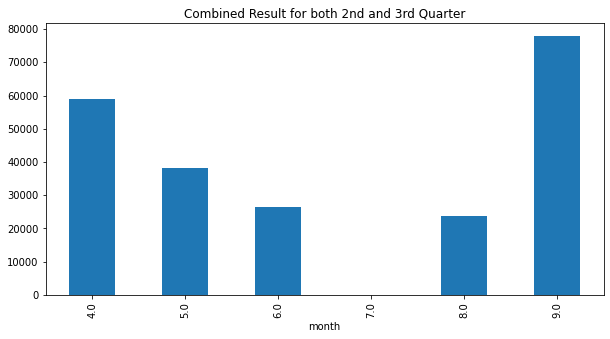

In [249]:
df23.groupby('month')['user_id'].count().plot.bar(figsize=(10,5),
                                                  legend= False,
                                                  title = "Combined Result for both 2nd and 3rd Quarter");

In Summary if we merge the entire sale. based on the earlier graph July was the highest hit sales in the entire 2 and 3rd quarter of 2020. Which can be attributed to external factors:
-  Georgraphical mobility was restricted: Due to covid the government restricted the movement of goods and services in and out of 2 major metropolitan areas ie Nairobi and Mombasa.
- Economic hardship due to the low economic performance in entire the country due to covid. The spending of individual restricted to basic needs like foods and shelter.


### 1.3.2 - Combined Performance of areas in  both 2nd and 3rd Quarter

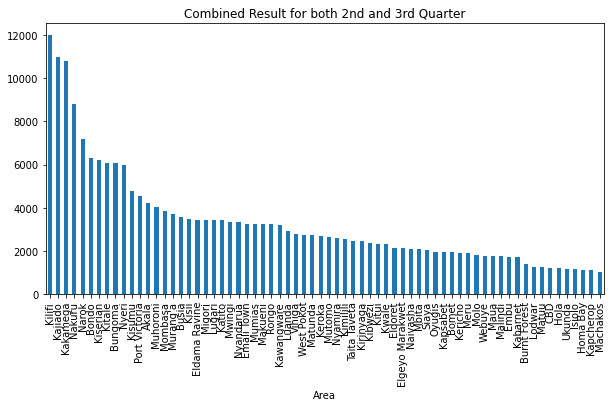

In [252]:
df23.groupby('Area')['user_id'].count().sort_values(ascending = False).plot.bar(figsize=(10,5),
                                                  legend= False,
                                                  title = "Combined Result for both 2nd and 3rd Quarter");

In Summary the overall perforamce for both quarter the above was the performance with Kilifi topped in sales for the 2 quarter and machakos recording the lowest no of sales.